In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from solardatatools import DataHandler
from solardatatools.algorithms import TimeShift
import numpy as np
import seaborn as sns

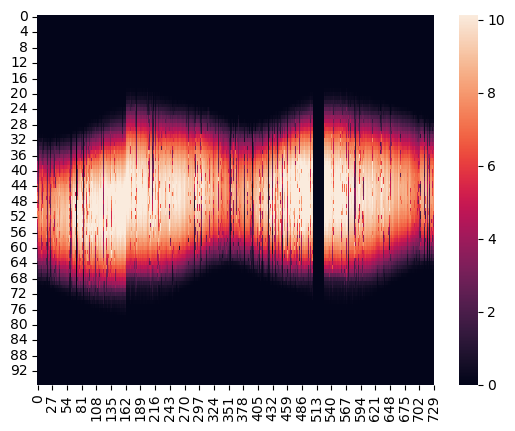

In [4]:
power_data_matrix = np.loadtxt("two_year_signal_with_shift.csv", delimiter=",")
sns.heatmap(power_data_matrix);

In [7]:
use_days = np.loadtxt("clear_days.csv", delimiter=",")
use_days = np.asarray(use_days, dtype=bool)
use_days

array([False, False,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True,

In [9]:
time_shift_analysis = TimeShift()
time_shift_analysis.run(
            power_data_matrix, use_ixs=use_days, w1=75, solver="CLARABEL"
        )

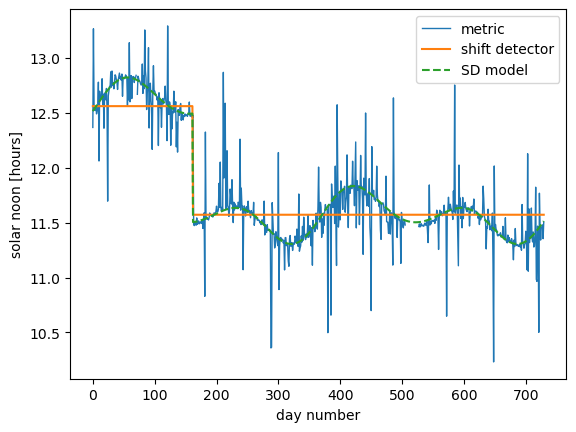

In [10]:
time_shift_analysis.plot_analysis();

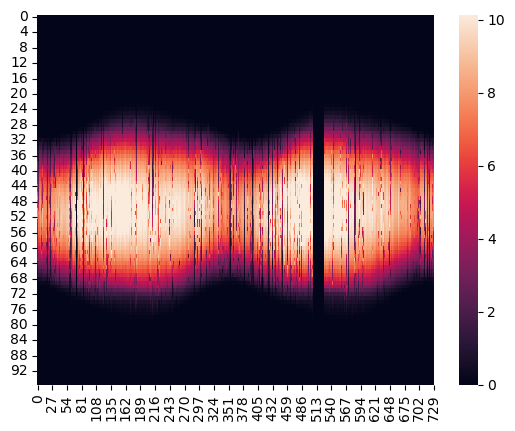

In [12]:
sns.heatmap(time_shift_analysis.corrected_data);

In [13]:
np.savetxt("two_year_signal_fixed.csv", time_shift_analysis.corrected_data, delimiter=',')